# Sprint 6
## Tasca M6 T01

## Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as met
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint


cols=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv('housing data.csv', sep=',',encoding='unicode-escape',names=cols)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
#Model metrics
def metricstest(y_test,y_pred):

    r_sq = met.r2_score(y_test, y_pred)
    MSE=met.mean_squared_error(y_test, y_pred)
    MAE=met.mean_absolute_error(y_test, y_pred)
    RMSE=math.sqrt(MSE)
    print('\n\033[1m'+'Error and accuracy test'+'\033[0m'+'\n')
    print('R^2:',r_sq)
    print('MAE:',MAE)
    print('MSE:',MSE)
    print('RMSE:',RMSE)

    errors = abs(y_pred - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    #accuracy = 100 - np.mean(mape)
    #print('Accuracy:', round(accuracy, 2), '%.')
    return r_sq,MAE,MSE,RMSE#,accuracy

def statsprint(model,r_sq):
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"coefficients: {model.coef_}")

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


Linear Regression with one highly correlated label

coefficient of determination: 0.5599410529844033
intercept: [22.52252475]
coefficients: [[-6.79893527]]

Error and accuracy test

R^2: 0.5599410529844033
MAE: 4.056526846127297
MSE: 35.559517728473736
RMSE: 5.963180169043506


Text(0.5, 0, 'RM')

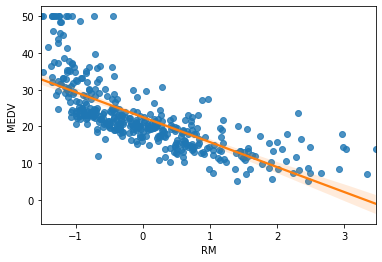

In [3]:
#Definition of features and labels
feat=['MEDV']
colsr=['LSTAT']

X=df[colsr]
y=df[feat]


#Data preparation
display(y.describe())
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#Model fitting
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
r_sq = model.score(X_test, y_test)

print('\033[1m'+'Linear Regression with one highly correlated label'+'\033[0m'+'\n')
statsprint(model,r_sq)

#Error testing
M1=metricstest(y_test,y_pred)


#Plot
sns.regplot(x=X_train, y=y_train,line_kws={"color": "C1"})
plt.xlabel('RM')

In [4]:
#Definition of features and labels
feat=['MEDV']
colsr=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X=np.array(df[colsr])
y=np.array(df[feat])


#Data preparation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)
print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting
model2 = LinearRegression().fit(X_train,y_train)
y_pred = model2.predict(X_test)
r_sq = model2.score(X_test, y_test)

print('\n\033[1m'+'Linear Regression with multiple labels'+'\033[0m'+'\n')
statsprint(model2,r_sq)

#Error testing
M2=metricstest(y_test,y_pred)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Linear Regression with multiple labels

coefficient of determination: 0.706214333311489
intercept: [69.9737051]
coefficients: [[-9.83309417e-02  5.47164338e-02 -2.41282466e-02  3.06093097e+00
  -2.19061124e+01  3.38731629e-02 -1.52576402e+00  3.82261638e-01
  -1.46516769e-02 -1.18945229e+00  5.61896182e-03 -7.69485523e-01]]

Error and accuracy test

R^2: 0.706214333311489
MAE: 3.4055333008884507
MSE: 23.73972099381341
RMSE: 4.872342454488745


In [5]:
model3 = sm.OLS(y_train, X_train).fit()
y_pred = model3.predict(X_test)

#Error testing
M3=metricstest(y_test,y_pred)

# Print out the statistics
display(model3.summary())

X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print('R^2:',result.rsquared, '\nR^2 adjusted:',result.rsquared_adj)


Error and accuracy test

R^2: 0.4632984140297771
MAE: 5.017707654235746
MSE: 43.36884794784482
RMSE: 6.585502862184848


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              426.3
Date:                Sun, 26 Mar 2023   Prob (F-statistic):                   2.08e-216
Time:                        13:35:50   Log-Likelihood:                         -1329.1
No. Observations:                 404   AIC:                                      2682.
Df Residuals:                     392   BIC:                                      2730.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0910      0.055     -1.659      0.098      -0.199       0.017
x2             0.1032      0.020      5.111      0.000       0.064       0.143
x3            -0.2520      0.089     -2.821      0.005      -0.428      -0.076
x4             5.3735      1.331      4.036      0.000       2.756       7.991
x5            28.7054      4.245      6.763      0.000      20.360      37.051
x6             0.0563      0.020      2.831      0.005       0.017       0.095
x7            -0.1355      0.278     -0.487      0.626      -0.682       0.411
x8             0.1039      0.096      1.082      0.280      -0.085       0.293
x9            -0.0095      0.005     -1.748      0.081      -0.020       0.001
x10            0.5888      0.140      4.194      0.000       0.313       0.865
x11            0.0218      0.004      5.302      0.000       0.014       0.030
x12           -0.8713      0.066    -13.114      0.000      -1.002      -0.741
==============================================================================
Omnibus:                       69.291   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.101
Skew:                           1.014   Prob(JB):                     6.15e-26
Kurtosis:                       4.669   Cond. No.                     7.19e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2: 0.6931560054292407 
R^2 adjusted: 0.6837387984347416


In [6]:
#Definition of features and labels
feat=['MEDV']
colsr=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X=np.array(df[colsr])
y=np.array(df[feat])


#Data preparation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting

regressor = RandomForestRegressor(random_state=7)
R=regressor.fit(X_train,np.ravel(y_train))
y_pred = R.predict(X_test)



print('\n\033[1m'+'Random Forest Regression'+'\033[0m')

#Error testing
M4=metricstest(y_test,y_pred)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Random Forest Regression

Error and accuracy test

R^2: 0.8073073355821276
MAE: 2.705696078431373
MSE: 15.570773558823525
RMSE: 3.945981951152783


In [7]:
#Definition of features and labels
dfn=df
target_col = ['MEDV'] 
predictors = ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
dfn[predictors] = dfn[predictors]/dfn[predictors].max()

X=np.array(dfn[predictors])
y=np.array(dfn[target_col])


#Data preparation


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)
print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting
mlp = MLPRegressor(hidden_layer_sizes=(33,25,20), solver='adam', max_iter=1000)
mlp=mlp.fit(X_train,np.ravel(y_train))

y_pred = mlp.predict(X_test)

print('\n\033[1m'+'Neural Network'+'\033[0m')


#Error testing
M5=metricstest(y_test,y_pred)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Neural Network

Error and accuracy test

R^2: 0.703302182848877
MAE: 3.58311699698555
MSE: 23.975040981523065
RMSE: 4.896431453775603


## Exercici 2

Compara’ls en base al MSE i al R2.

In [8]:
from tabulate import tabulate
from IPython.display import display

ii=0
jj=3
M=[M1[ii:jj:2],M2[ii:jj:2],M3[ii:jj:2],M4[ii:jj:2],M5[ii:jj:2]]
N=['LR','MLR','OLS','RFR','NN']
Md=pd.DataFrame(M)
Md['Name']=N
Md.columns=['R2','MSE','Name']
print(tabulate(Md.sort_values(by='R2',axis=0,ascending=False), showindex=False,headers=Md.columns, tablefmt="github"))

|       R2 |     MSE | Name   |
|----------|---------|--------|
| 0.807307 | 15.5708 | RFR    |
| 0.706214 | 23.7397 | MLR    |
| 0.703302 | 23.975  | NN     |
| 0.559941 | 35.5595 | LR     |
| 0.463298 | 43.3688 | OLS    |


Comparant els valors de R^2 i el Mean Square Error veiem que el millor model per aquest cas és el de Random Forest Regression. El que pitjors resultats ha obtingut ha sigut el model de Linear Regression on només hem aportat la columna RM per fer la regressió. Així veiem que tenir més _labels_ com a norma general és millor que tenir molt poques. En el nostre cas també hem utilitzat la partició del dataset en train i test.

## Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [9]:
#Definition of features and labels
feat=['MEDV']
colsr=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X=np.array(df[colsr])
y=np.array(df[feat])


#Data preparation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting

regressor = RandomForestRegressor(random_state=7)
regressor.fit(X_train,np.ravel(y_train))
y_pred = regressor.predict(X_test)



print('\n\033[1m'+'Random Forest Regression'+'\033[0m')

## Define Grid 
grid1 = { 
    'n_estimators': [300,400],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [7]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5)
CV_rfr.fit(X_train, np.ravel(y_train))

y_pred=CV_rfr.predict(X_test)
MA1=metricstest(y_test,y_pred)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Random Forest Regression

Error and accuracy test

R^2: 0.8029566904903853
MAE: 2.728096997767573
MSE: 15.922332917676012
RMSE: 3.990279804434272


In [10]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [7]
}

rsh = HalvingRandomSearchCV(
    estimator=regressor, param_distributions=grid, factor=3, random_state=7
)
rsh.fit(X_test,np.ravel(y_test))
#results = pd.DataFrame(rsh.cv_results_)
y_pred=rsh.predict(X_test)
MA2=metricstest(y_test,y_pred)

/Users/franciscodelcampo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/franciscodelcampo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/franciscodelcampo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/franciscodelcampo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/franciscodelcampo/opt/anaconda3/lib/python3.8/site-packages/sklearn/metri


Error and accuracy test

R^2: 0.9423152656429726
MAE: 1.561940573550098
MSE: 4.661287647807585
RMSE: 2.1590015395565576


## Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

- Per fer aquesta comparació agafarem els tres models amb més R^2, Random Forest, Linear Regression i Neural Network.

In [11]:
#Definition of features and labels
feat=['MEDV']
colsr=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X=np.array(df[colsr])
y=np.array(df[feat])


#Data preparation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting

regressor = RandomForestRegressor(random_state=0)
R1=regressor.fit(X_train,np.ravel(y_train))
R2=regressor.fit(X,np.ravel(y))
y_pred1 = R1.predict(X_test)
y_pred2 = R2.predict(X)



print('\n\033[1m'+'Random Forest Regression'+'\033[0m')

#Error testing
M3_1=metricstest(y_test,y_pred1)
M3_2=metricstest(y,y_pred2)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Random Forest Regression

Error and accuracy test

R^2: 0.9744940790963733
MAE: 1.0102549019607832
MSE: 2.06103807843138
RMSE: 1.4356315956509804

Error and accuracy test

R^2: 0.9754832457303457
MAE: 0.9920395256916985
MSE: 2.06969351383399
RMSE: 1.4386429417454458


In [12]:
#Definition of features and labels
feat=['MEDV']
colsr=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X=np.array(df[colsr])
y=np.array(df[feat])


#Data preparation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting

linear_reg1 = LinearRegression().fit(X_train,np.ravel(y_train))
linear_reg2 = LinearRegression().fit(X,np.ravel(y))
y_pred1 = linear_reg1.predict(X_test)
y_pred2 = linear_reg2.predict(X)



print('\n\033[1m'+'Linear Regression'+'\033[0m')

#Error testing
M4_1=metricstest(y_test,y_pred1)
M4_2=metricstest(y,y_pred2)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Linear Regression

Error and accuracy test

R^2: 0.7062143333114872
MAE: 3.4055333008884805
MSE: 23.739720993813556
RMSE: 4.87234245448876

Error and accuracy test

R^2: 0.6968344625005227
MAE: 3.6059310857507794
MSE: 25.59310011755123
RMSE: 5.0589623558148


In [13]:
#Definition of features and labels
dfn=df
target_col = ['MEDV'] 
predictors = ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
dfn[predictors] = dfn[predictors]/dfn[predictors].max()

X=np.array(dfn[predictors])
y=np.array(dfn[target_col])


#Data preparation


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)
print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting
mlp = MLPRegressor(hidden_layer_sizes=(33,25,20), solver='adam', max_iter=1500)
MLP1=mlp.fit(X_train,np.ravel(y_train))
MLP2=mlp.fit(X,np.ravel(y))

y_pred1 = MLP1.predict(X_test)
y_pred2 = MLP2.predict(X)


print('\n\033[1m'+'Neural Network'+'\033[0m')


#Error testing
M5_1=metricstest(y_test,y_pred1)
M5_2=metricstest(y,y_pred2)

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Neural Network

Error and accuracy test

R^2: 0.8126309714801827
MAE: 2.569308492481201
MSE: 15.140590451808723
RMSE: 3.8910911646745987

Error and accuracy test

R^2: 0.838806998769409
MAE: 2.603410754366357
MSE: 13.60784161936674
RMSE: 3.6888808085063878


Veiem com obtenim millors resultats amb totes les dades degut al _overfitting_ de les dades ja que el model s'adaptarà a les dades i al predir dades amb les que ha entrenat s'obtindràn millors resultats. A més al tenir només 500 observacions per entrenar el model, el fet de utilitzar més per entrenar als models afecta més significativament que si tinguèssim 50000.

## Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

- Farem servir les altres variables ja que crec que poden ser prou rellevants per l'algoritme al no tenir moltes files de dades o observacions.

Train set - Features:  (404, 12) Target:  (404, 1)
Test set - Features:  (102, 12) Target:  (102, 1)

Random Forest Regression


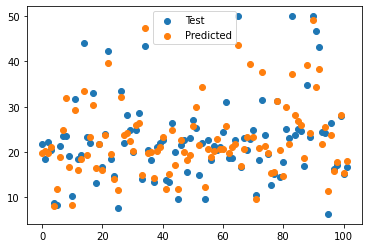

In [14]:
#Definition of features and labels
feat=['MEDV']
colsr=['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X=np.array(df[colsr])
y=np.array(df[feat])


#Data preparation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

print("Train set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

#Model fitting

regressor = RandomForestRegressor(random_state=0)
R1=regressor.fit(X_train,np.ravel(y_train))
y_pred1 = R1.predict(X_test)



print('\n\033[1m'+'Random Forest Regression'+'\033[0m')

plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),y_pred1)
plt.legend(['Test', 'Predicted'])
#Error testing
#MF=metricstest(y_test,y_pred1)

Representació dels valors reals i els valors predits visualment per veure el caràcter general de la predicció.

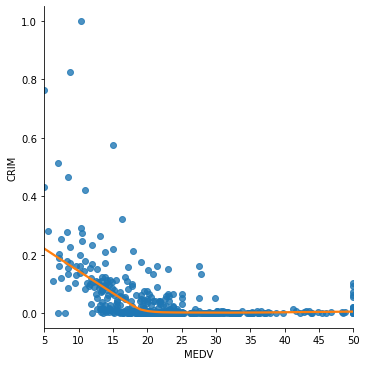

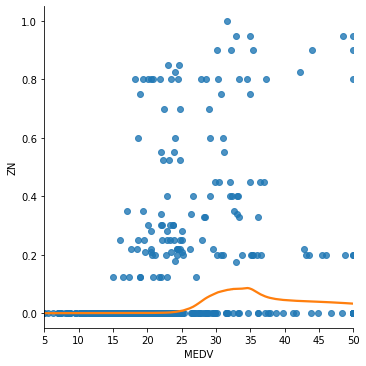

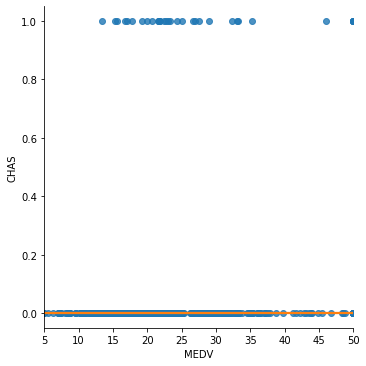

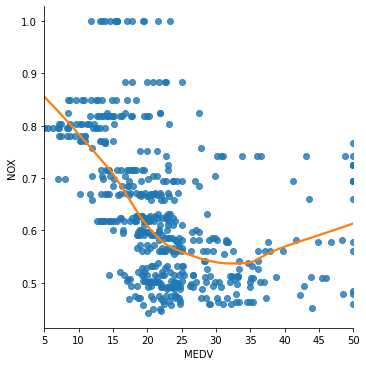

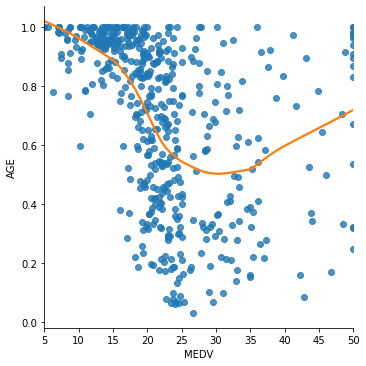

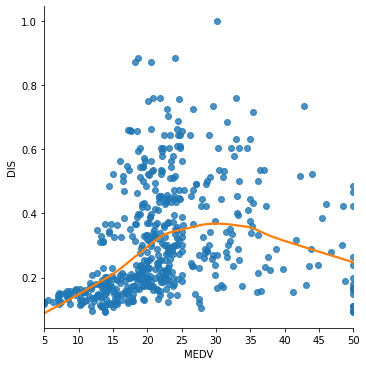

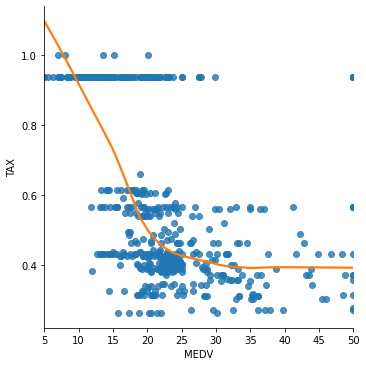

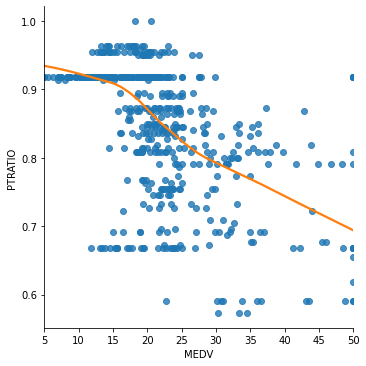

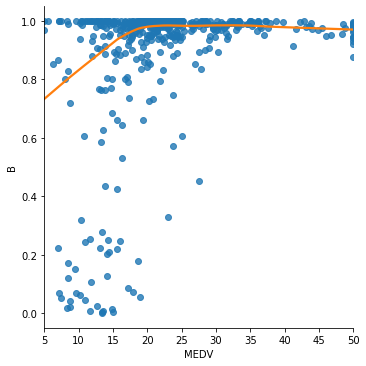

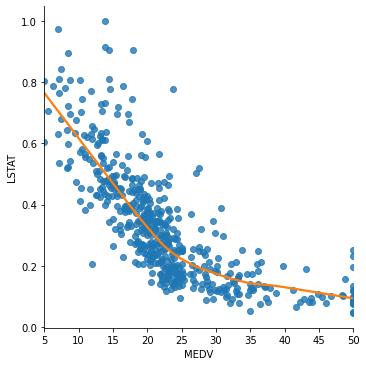

In [15]:
col=['CRIM','ZN','CHAS','NOX','AGE','DIS','TAX','PTRATIO','B','LSTAT']
for ii in range(len(col)):
    yv=col[ii]
    sns.lmplot(x="MEDV", y=yv, data=df,
           lowess=True, line_kws={"color": "C1"})

Gràfiques que mostren les dades amb una regressió lineal ja precreada.